# Hadamard Transform

Learning outcomes

1. Define the Hadamard transform.
2. Understand the effect of applying an oracle between Hadamard transforms.


Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

By testing in pairs, we managed to halve the run time of our lock breaking algorithm. We might hope that testing more states at the same time will reduce the number of steps required even further. Testing in pairs involved applying a Hadamard, the oracle, and then another Hadamard to the last qubit:

![](https://codebook.xanadu.ai/pics/pair-test-circuit.svg)

We can simply generalize this strategy by doing the same thing to every qubit! Here is the circuit diagram:

![](https://codebook.xanadu.ai/pics/hadamard.svg)

The layer of Hadamards is called the Hadamard transform. Let's see what this circuit does for the case of a single solution.



### Codercise A.5.1
 Implement the circuit above, consisting of a Hadamard transform, an oracle, and a Hadamard transform. The oracle is provided as oracle_matrix(combo), which you can invoke using the QubitUnitary() function.

*Tip. To implement the Hadamard transform, apply PennyLane's broadcast() function instead of a for loop. This applies a unitary multiple times according to a given pattern, and for a specified set of wires.*

In [3]:
import pennylane as qml

In [4]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def hoh_circuit(combo):
    """A circuit which applies Hadamard-oracle-Hadamard and returns probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: Measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
    
    qml.QubitUnitary(oracle_matrix(combo), wires = [i for i in range(n_bits)])
    for i in range(n_bits):
        qml.Hadamard(wires=i)
    return qml.probs(wires=range(n_bits))


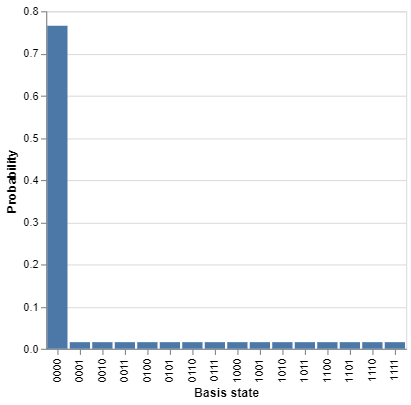

We finally have something noticeably different from the uniform distribution. But curiously, whatever the secret combination, the probability distribution is the same, with a big peak at 0 and a small probability of observing any other state. Since the output of the circuit doesn't change, we cannot use it to learn the secret combination! But perhaps, like the pair-testing algorithm applied to a lock with multiple solutions, we can learn something else.